<a href="https://colab.research.google.com/github/Kggzzz/DentalShadeMatching/blob/main/train_noref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import

In [2]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle

In [3]:
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

In [7]:
path = '/content/drive/My Drive/shadeimg/SVM shade'

#เตรียมข้อมูล

##Set1

In [8]:
Set1 = os.path.join(path,'Datapoint_1.xlsx')
print(Set1)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_1.xlsx


In [9]:
S1_A1 = pd.read_excel(Set1, sheet_name='A1_1')
S1_A2 = pd.read_excel(Set1, sheet_name='A2_1')
S1_A3 = pd.read_excel(Set1, sheet_name='A3_1')
S1_A3_5 = pd.read_excel(Set1, sheet_name='A3.5_1')
S1_A4 = pd.read_excel(Set1, sheet_name='A4_1')
S1_B1 = pd.read_excel(Set1, sheet_name='B1_1')
S1_B2 = pd.read_excel(Set1, sheet_name='B2_1')
S1_B3 = pd.read_excel(Set1, sheet_name='B3_1')
S1_B4 = pd.read_excel(Set1, sheet_name='B4_1')
S1_C1 = pd.read_excel(Set1, sheet_name='C1_1')
S1_C2 = pd.read_excel(Set1, sheet_name='C2_1')
S1_C3 = pd.read_excel(Set1, sheet_name='C3_1')
S1_C4 = pd.read_excel(Set1, sheet_name='C4_1')
S1_D2 = pd.read_excel(Set1, sheet_name='D2_1')
S1_D3 = pd.read_excel(Set1, sheet_name='D3_1')
S1_D4 = pd.read_excel(Set1, sheet_name='D4_1')

In [10]:
table_Set1 = pd.concat([S1_A1,S1_A2,S1_A3,S1_A3_5,S1_A4,S1_B1,S1_B2,S1_B3,S1_B4,S1_C1,S1_C2,S1_C3,S1_C4,S1_D2,S1_D3,S1_D4])

##Set2

In [11]:
Set2 = os.path.join(path,'Datapoint_2.xlsx')
print(Set2)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_2.xlsx


In [12]:
S2_A1 = pd.read_excel(Set2, sheet_name='A1_2')
S2_A2 = pd.read_excel(Set2, sheet_name='A2_2')
S2_A3 = pd.read_excel(Set2, sheet_name='A3_2')
S2_A3_5 = pd.read_excel(Set2, sheet_name='A3.5_2')
S2_A4 = pd.read_excel(Set2, sheet_name='A4_2')
S2_B1 = pd.read_excel(Set2, sheet_name='B1_2')
S2_B2 = pd.read_excel(Set2, sheet_name='B2_2')
S2_B3 = pd.read_excel(Set2, sheet_name='B3_2')
S2_B4 = pd.read_excel(Set2, sheet_name='B4_2')
S2_C1 = pd.read_excel(Set2, sheet_name='C1_2')
S2_C2 = pd.read_excel(Set2, sheet_name='C2_2')
S2_C3 = pd.read_excel(Set2, sheet_name='C3_2')
S2_C4 = pd.read_excel(Set2, sheet_name='C4_2')
S2_D2 = pd.read_excel(Set2, sheet_name='D2_2')
S2_D3 = pd.read_excel(Set2, sheet_name='D3_2')
S2_D4 = pd.read_excel(Set2, sheet_name='D4_2')

In [13]:
table_Set2 = pd.concat([S2_A1,S2_A2,S2_A3,S2_A3_5,S2_A4,S2_B1,S2_B2,S2_B3,S2_B4,S2_C1,S2_C2,S2_C3,S2_C4,S2_D2,S2_D3,S2_D4])

##Set3

In [14]:
Set3 = os.path.join(path,'Datapoint_3.xlsx')
print(Set3)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_3.xlsx


In [15]:
S3_A1 = pd.read_excel(Set3, sheet_name='A1_3')
S3_A2 = pd.read_excel(Set3, sheet_name='A2_3')
S3_A3 = pd.read_excel(Set3, sheet_name='A3_3')
S3_A3_5 = pd.read_excel(Set3, sheet_name='A3.5_3')
S3_A4 = pd.read_excel(Set3, sheet_name='A4_3')
S3_B1 = pd.read_excel(Set3, sheet_name='B1_3')
S3_B2 = pd.read_excel(Set3, sheet_name='B2_3')
S3_B3 = pd.read_excel(Set3, sheet_name='B3_3')
S3_B4 = pd.read_excel(Set3, sheet_name='B4_3')
S3_C1 = pd.read_excel(Set3, sheet_name='C1_3')
S3_C2 = pd.read_excel(Set3, sheet_name='C2_3')
S3_C3 = pd.read_excel(Set3, sheet_name='C3_3')
S3_C4 = pd.read_excel(Set3, sheet_name='C4_3')
S3_D2 = pd.read_excel(Set3, sheet_name='D2_3')
S3_D3 = pd.read_excel(Set3, sheet_name='D3_3')
S3_D4 = pd.read_excel(Set3, sheet_name='D4_3')

In [16]:
table_Set3 = pd.concat([S3_A1,S3_A2,S3_A3,S3_A3_5,S3_A4,S3_B1,S3_B2,S3_B3,S3_B4,S3_C1,S3_C2,S3_C3,S3_C4,S3_D2,S3_D3,S3_D4])

##Set4

In [17]:
Set4 = os.path.join(path,'Datapoint_4.xlsx')
print(Set4)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_4.xlsx


In [18]:
S4_A1 = pd.read_excel(Set4, sheet_name='A1_4')
S4_A2 = pd.read_excel(Set4, sheet_name='A2_4')
S4_A3 = pd.read_excel(Set4, sheet_name='A3_4')
S4_A3_5 = pd.read_excel(Set4, sheet_name='A3.5_4')
S4_A4 = pd.read_excel(Set4, sheet_name='A4_4')
S4_B1 = pd.read_excel(Set4, sheet_name='B1_4')
S4_B2 = pd.read_excel(Set4, sheet_name='B2_4')
S4_B3 = pd.read_excel(Set4, sheet_name='B3_4')
S4_B4 = pd.read_excel(Set4, sheet_name='B4_4')
S4_C1 = pd.read_excel(Set4, sheet_name='C1_4')
S4_C2 = pd.read_excel(Set4, sheet_name='C2_4')
S4_C3 = pd.read_excel(Set4, sheet_name='C3_4')
S4_C4 = pd.read_excel(Set4, sheet_name='C4_4')
S4_D2 = pd.read_excel(Set4, sheet_name='D2_4')
S4_D3 = pd.read_excel(Set4, sheet_name='D3_4')
S4_D4 = pd.read_excel(Set4, sheet_name='D4_4')

In [19]:
table_Set4 = pd.concat([S4_A1,S4_A2,S4_A3,S4_A3_5,S4_A4,S4_B1,S4_B2,S4_B3,S4_B4,S4_C1,S4_C2,S4_C3,S4_C4,S4_D2,S4_D3,S4_D4])

##Set5

In [20]:
Set5 = os.path.join(path,'Datapoint_5.xlsx')
print(Set5)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_5.xlsx


In [21]:
S5_A1 = pd.read_excel(Set5, sheet_name='A1_5')
S5_A2 = pd.read_excel(Set5, sheet_name='A2_5')
S5_A3 = pd.read_excel(Set5, sheet_name='A3_5')
S5_A3_5 = pd.read_excel(Set5, sheet_name='A3.5_5')
S5_A4 = pd.read_excel(Set5, sheet_name='A4_5')
S5_B1 = pd.read_excel(Set5, sheet_name='B1_5')
S5_B2 = pd.read_excel(Set5, sheet_name='B2_5')
S5_B3 = pd.read_excel(Set5, sheet_name='B3_5')
S5_B4 = pd.read_excel(Set5, sheet_name='B4_5')
S5_C1 = pd.read_excel(Set5, sheet_name='C1_5')
S5_C2 = pd.read_excel(Set5, sheet_name='C2_5')
S5_C3 = pd.read_excel(Set5, sheet_name='C3_5')
S5_C4 = pd.read_excel(Set5, sheet_name='C4_5')
S5_D2 = pd.read_excel(Set5, sheet_name='D2_5')
S5_D3 = pd.read_excel(Set5, sheet_name='D3_5')
S5_D4 = pd.read_excel(Set5, sheet_name='D4_5')

In [22]:
table_Set5 = pd.concat([S5_A1,S5_A2,S5_A3,S5_A3_5,S5_A4,S5_B1,S5_B2,S5_B3,S5_B4,S5_C1,S5_C2,S5_C3,S5_C4,S5_D2,S5_D3,S5_D4])

##Set6

In [23]:
Set6 = os.path.join(path,'Datapoint_6.xlsx')
print(Set6)

/content/drive/My Drive/shadeimg/SVM shade/Datapoint_6.xlsx


In [24]:
S6_A1 = pd.read_excel(Set6, sheet_name='A1_6')
S6_A2 = pd.read_excel(Set6, sheet_name='A2_6')
S6_A3 = pd.read_excel(Set6, sheet_name='A3_6')
S6_A3_5 = pd.read_excel(Set6, sheet_name='A3.5_6')
S6_A4 = pd.read_excel(Set6, sheet_name='A4_6')
S6_B1 = pd.read_excel(Set6, sheet_name='B1_6')
S6_B2 = pd.read_excel(Set6, sheet_name='B2_6')
S6_B3 = pd.read_excel(Set6, sheet_name='B3_6')
S6_B4 = pd.read_excel(Set6, sheet_name='B4_6')
S6_C1 = pd.read_excel(Set6, sheet_name='C1_6')
S6_C2 = pd.read_excel(Set6, sheet_name='C2_6')
S6_C3 = pd.read_excel(Set6, sheet_name='C3_6')
S6_C4 = pd.read_excel(Set6, sheet_name='C4_6')
S6_D2 = pd.read_excel(Set6, sheet_name='D2_6')
S6_D3 = pd.read_excel(Set6, sheet_name='D3_6')
S6_D4 = pd.read_excel(Set6, sheet_name='D4_6')

In [25]:
table_Set6 = pd.concat([S6_A1,S6_A2,S6_A3,S6_A3_5,S6_A4,S6_B1,S6_B2,S6_B3,S6_B4,S6_C1,S6_C2,S6_C3,S6_C4,S6_D2,S6_D3,S6_D4])

#Train

##Set5 test

In [26]:
RGB_tableSet5 = table_Set5.drop(['R-ref','G-ref','B-ref','H-ref','S-ref','V-ref','H-Shad','S-Shad','V-Shad','Setting','Ref','Shad','Img'], axis=1)

In [27]:
RGB_tableall = pd.concat([table_Set1,table_Set2,table_Set3,table_Set4,table_Set6])

In [28]:
RGB_tableall_1 = RGB_tableall.drop(['R-ref','G-ref','B-ref','H-ref','S-ref','V-ref','H-Shad','S-Shad','V-Shad','Setting','Ref','Shad','Img'], axis=1)

In [29]:
X_test_RGB_Set5 = np.array(RGB_tableSet5)

In [30]:
y_RGB_Set5 =  table_Set5.iloc[:,14:15]

In [31]:
y_test_RGB_Set5 = np.array(y_RGB_Set5)

In [32]:
y_test_RGB = np.array(y_test_RGB_Set5)

In [33]:
X_train_RGB = np.array(RGB_tableall_1)

In [34]:
y_train_RGB_Set5 = RGB_tableall.iloc[:,14:15]

In [35]:
y_train_RGB = np.array(y_train_RGB_Set5)

In [36]:
RF = RandomForestClassifier()

In [37]:
RF.fit(X_train_RGB, y_train_RGB)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [38]:
y_pred_RGB_Set5 = RF.predict(X_test_RGB_Set5)

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test_RGB, y_pred_RGB_Set5))

Accuracy: 0.3053125


#Confusion

In [40]:
le = LabelEncoder()

In [41]:
new_y_test_s5 = np.array(table_Set5['Shad'])
new_y_test_s5.shape = (len(new_y_test_s5),)
np.left_shift = LabelEncoder()
new_y_test_s5 = le.fit_transform(new_y_test_s5)
new_y_test_s5 = to_categorical(new_y_test_s5, num_classes=16)

new_y_pred_s5 = RF.predict(X_test_RGB_Set5)
new_y_pred2_s5 = le.fit_transform(new_y_pred_s5)
new_y_pred2_s5 = to_categorical(new_y_pred2_s5, num_classes=16)

In [42]:
new_y_test_s5.ndim

2

In [43]:
new_y_pred2_s5.ndim

2

In [44]:
y_pred = new_y_pred2_s5.argmax(axis=1)          #ค่า predict 
y_true  = new_y_test_s5.argmax(axis=1)
confusion_matrix(y_true, y_pred)

array([[128,   5,   0,   0,   2,  45,   4,   6,   2,  42,  31, 132,  20,
        320,  52,  11],
       [  4, 208,   0,   1,  59,   0,  13,   0,   7,  21, 102,  46, 226,
         69,  24,  20],
       [  4,  80, 130,  35,  77,   0,   0,   6,  13,  12,  51,  48,  99,
          0, 192,  53],
       [  0,   0,   5, 328, 242,   0,   0,  13,   1,   0,   0, 100, 101,
          0,  10,   0],
       [  0,   0,   6,  50, 310,   0,   0,   0,   0,   0,   5, 127, 257,
          0,  44,   1],
       [ 32,  25,   0,   7,   2, 304,   6,  17,   6,  66, 206,  23,   0,
         68,  25,  13],
       [ 51,  97,  11,   1,   0,  24, 223,   7,   2, 174, 129,  15,   9,
         47,   6,   4],
       [  0,  28, 147,  57, 150,   0,   0,  75,   9,   3,  40,  58,  48,
          0,  57, 128],
       [  0,   0,   6, 225, 205,   0,   0,  45, 175,   0,   0,  54,  70,
          0,   3,  17],
       [192,   6,   3,   0,   1,  38,  24,   0,  10, 151,  12,  45,  18,
        283,  10,   7],
       [ 10, 138,  13,   1,  1

In [45]:
class_names = le.classes_ 
class_names

array(['A1', 'A2', 'A3', 'A3.5', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2',
       'C3', 'C4', 'D2', 'D3', 'D4'], dtype=object)

Confusion matrix, without normalization
[[128   5   0   0   2  45   4   6   2  42  31 132  20 320  52  11]
 [  4 208   0   1  59   0  13   0   7  21 102  46 226  69  24  20]
 [  4  80 130  35  77   0   0   6  13  12  51  48  99   0 192  53]
 [  0   0   5 328 242   0   0  13   1   0   0 100 101   0  10   0]
 [  0   0   6  50 310   0   0   0   0   0   5 127 257   0  44   1]
 [ 32  25   0   7   2 304   6  17   6  66 206  23   0  68  25  13]
 [ 51  97  11   1   0  24 223   7   2 174 129  15   9  47   6   4]
 [  0  28 147  57 150   0   0  75   9   3  40  58  48   0  57 128]
 [  0   0   6 225 205   0   0  45 175   0   0  54  70   0   3  17]
 [192   6   3   0   1  38  24   0  10 151  12  45  18 283  10   7]
 [ 10 138  13   1  12   0   2   0   0  77 290   0 152  51  53   1]
 [  0  38   5  57  26   0   0   2   0   0 114 259  35   0 260   4]
 [  0   0   0  60  75   0   0   0   0   0  17 250 378   0  20   0]
 [ 78   0   0   2   7  15   0   0   2  16  10 181 132 355   2   0]
 [  0  67   5  11  27 

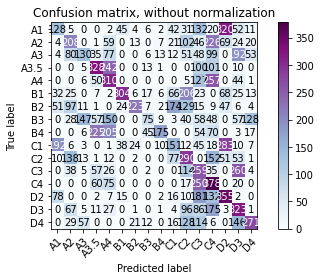

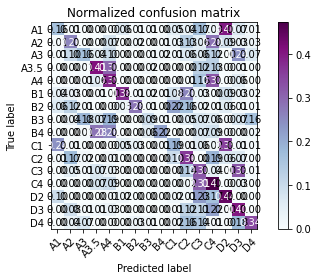

In [46]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.BuPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()